# Library

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [11]:
xTrain=np.load("../Data/julyData/trainData.npy")
yTrain=np.load("../Data/julyData/trainTarget.npy")
xTest=np.load('../Data/julyData/testData.npy')
yTest=np.load("../Data/julyData/testTarget.npy")
# xTrain_r=np.reshape(xTrain,(xTrain.shape[0],xTrain.shape[1]*2))
yTrain=np.reshape(yTrain,(yTrain.shape[0]))
# xTest_r=np.reshape(xTest,(xTest.shape[0],xTest.shape[1]*2))
yTest=np.reshape(yTest,(yTest.shape[0]))
print("X shape: {}\nY shape: {}".format(xTrain.shape,yTrain.shape))

X shape: (1600, 3000)
Y shape: (1600,)


# PCA

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(xTrain)
X_test = sc.transform(xTest)

In [5]:
pca = PCA(n_components = 100)
xTrain = pca.fit_transform(X_train)
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())
xTest = pca.transform(X_test)
print("X shape: {}".format(xTrain.shape))

[10.64893805 10.42536558  7.93215763  6.73599355  6.29538171  5.95360364
  5.88497279  5.77841122  5.72793945  5.70539904  5.68323732  5.65051656
  5.60668659  5.58450118  5.55739495  5.54552802  5.52383516  5.51003349
  5.46973345  5.46289061  5.41670476  5.41167622  5.37864128  5.34685029
  5.3311916   5.32321658  5.28706852  5.2743131   5.27029701  5.26125641
  5.23132554  5.22408664  5.19948696  5.17491073  5.1494801   5.14056361
  5.12857779  5.1053727   5.08311272  5.07295029  5.06322518  5.03779024
  5.02917642  5.01541292  5.00630668  4.99701915  4.98476499  4.97257639
  4.95741766  4.94580539  4.91656823  4.90054816  4.8895353   4.85260752
  4.85172758  4.83466693  4.8220504   4.80781505  4.78798984  4.77532199
  4.76546348  4.76127766  4.74866739  4.71706705  4.70391934  4.69341089
  4.68381335  4.67741958  4.66446336  4.65348679  4.65032026  4.62020612
  4.59881215  4.59726495  4.57744255  4.5704349   4.56153681  4.54369039
  4.54011358  4.52744318  4.50614372  4.50377947  4

# Logistic Regression

In [12]:
classifier = LogisticRegression(random_state = 42, max_iter=500)
classifier.fit(xTrain, yTrain)
print(classifier.score(xTest,yTest))
pred = classifier.predict(xTest)


0.8975


# SVM

In [13]:
model=SVC(decision_function_shape='ovo')
model.fit(xTrain,yTrain)
print(model.score(xTest,yTest))

0.9175


# Output

In [14]:
for i in range(200):
    X_test[i].shape
    sample=np.reshape(X_test[i],(1,X_test.shape[1]))
    print(sample.shape)
    predi=classifier.predict(sample)
    print("predicted: {}  OG: {}".format(predi,yTest[i]))

(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [0.]  OG: 1.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [0.]  OG: 1.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted: [1.]  OG: 1.0
(1, 3000)
predicted: [0.]  OG: 0.0
(1, 3000)
predicted:

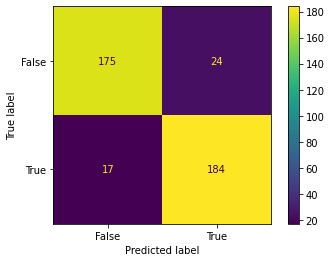

In [16]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(yTest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()